In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [4]:
# 1. Charger les données
df = pd.read_excel('Liste_Tot_Hotels.xlsx', sheet_name='Sheet1')

# 2. Garder les colonnes utiles
features = ['Type', 'Location', 'Fixed_Cost', 'Nbre-Etoile']
X = df[features].copy()

In [5]:
# 3. Préparation du préprocesseur (encodage + normalisation)
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), ['Type', 'Location']),
    ('num', StandardScaler(), ['Fixed_Cost', 'Nbre-Etoile'])
])

# 4. Pipeline sans clustering pour prétraiter les données
X_prepared = preprocessor.fit_transform(X)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

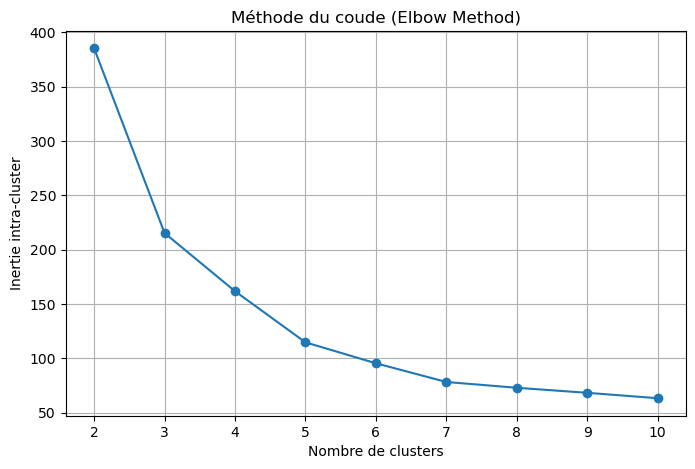

In [6]:
# 5. (Facultatif) Trouver le meilleur nombre de clusters (elbow method)
inertia = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_prepared)
    inertia.append(kmeans.inertia_)

# 6. Tracer l’elbow
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title("Méthode du coude (Elbow Method)")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie intra-cluster")
plt.grid(True)
plt.show()

In [7]:
# 7. Appliquer KMeans avec le nombre optimal (ex: 5 clusters ici)
kmeans_final = KMeans(n_clusters=6, random_state=42)
clusters = kmeans_final.fit_predict(X_prepared)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [8]:
# 8. Ajouter le cluster dans le DataFrame
df['Cluster'] = clusters

In [9]:
# 9. Aperçu du résultat
print(df[['Type', 'Location', 'Fixed_Cost', 'Nbre-Etoile', 'Cluster']].head())

     Type Location  Fixed_Cost  Nbre-Etoile  Cluster
0  resort  seaside          90            4        1
1  resort  seaside         138            4        1
2  resort  seaside          80            4        1
3  resort     city          50            3        2
4  resort  seaside          60            3        2


In [10]:
import numpy as np

print("Nombre de clusters trouvés :", len(np.unique(clusters)))
print("Labels de clusters :", np.unique(clusters))


Nombre de clusters trouvés : 6
Labels de clusters : [0 1 2 3 4 5]


In [11]:
for i in range(6):  # assuming you have 6 clusters (0 to 5)
    print(f"\nCluster {i}")
    display(df[df['Cluster'] == i].head(3))  # shows first 3 rows from each cluster



Cluster 0


,Hotel_id,Hotel Name,Nbre-Etoile,Location,Fixed_Cost,Type,Nbre_Rooms,Region_name,base_rate,Region_id,Cluster
7,8,Royal tulip port prince,5,seaside,160,resort,118,Cap Bon,136,2,0
12,13,Hasdrubal Prestige Thalassa & Spa Djerba,5,seaside,280,resort,200,Djerba,171,4,0
13,14,"Radisson Blu Palace Resort & Thalasso, Djerba",5,seaside,300,business,500,Djerba,193,4,0



Cluster 1


,Hotel_id,Hotel Name,Nbre-Etoile,Location,Fixed_Cost,Type,Nbre_Rooms,Region_name,base_rate,Region_id,Cluster
0,1,Andalucia beach hotel et résidence,4,seaside,90,resort,200,Bizerte,134,1,1
1,2,Bizerta Resort Congres & SPA,4,seaside,138,resort,400,Bizerte,196,1,1
2,3,Hotel Nour Congress & Resort,4,seaside,80,resort,500,Bizerte,166,1,1



Cluster 2


,Hotel_id,Hotel Name,Nbre-Etoile,Location,Fixed_Cost,Type,Nbre_Rooms,Region_name,base_rate,Region_id,Cluster
3,4,Al Madina Riad Hotel,3,city,50,resort,400,Bizerte,139,1,2
4,5,Complexe Touristique Sidi Salem,3,seaside,60,resort,300,Bizerte,139,1,2
10,11,Sufetula,3,city,80,resort,200,Centre-Ouest,147,3,2



Cluster 3


,Hotel_id,Hotel Name,Nbre-Etoile,Location,Fixed_Cost,Type,Nbre_Rooms,Region_name,base_rate,Region_id,Cluster
306,307,El Mouradi Hotel Africa Tunis,4,city,351,resort,138,Tunis_Centre_Ville,187,19,3
307,308,dar el jeld hotel and spa,4,city,598,business,980,Tunis_Centre_Ville,235,19,3
308,309,Laico Tunis Spa & Conference Center,4,city,383,business,494,Tunis_Centre_Ville,200,19,3



Cluster 4


,Hotel_id,Hotel Name,Nbre-Etoile,Location,Fixed_Cost,Type,Nbre_Rooms,Region_name,base_rate,Region_id,Cluster
9,10,byzacene,4,city,150,resort,300,Centre-Ouest,160,3,4
78,79,L’oasis,4,city,80,resort,366,Gabès,164,6,4
198,199,Business Hotel Sfax,4,city,133,business,820,Sfax,237,12,4



Cluster 5


,Hotel_id,Hotel Name,Nbre-Etoile,Location,Fixed_Cost,Type,Nbre_Rooms,Region_name,base_rate,Region_id,Cluster
85,86,Les Orangers Garden Villas & Bungalows,5,seaside,547,resort,629,Hammamet,172,7,5
127,128,Alhambra Thalasso,5,seaside,530,resort,270,Hammamet,192,7,5
128,129,Golden Tulip Taj Sultan,5,seaside,519,resort,870,Hammamet,188,7,5


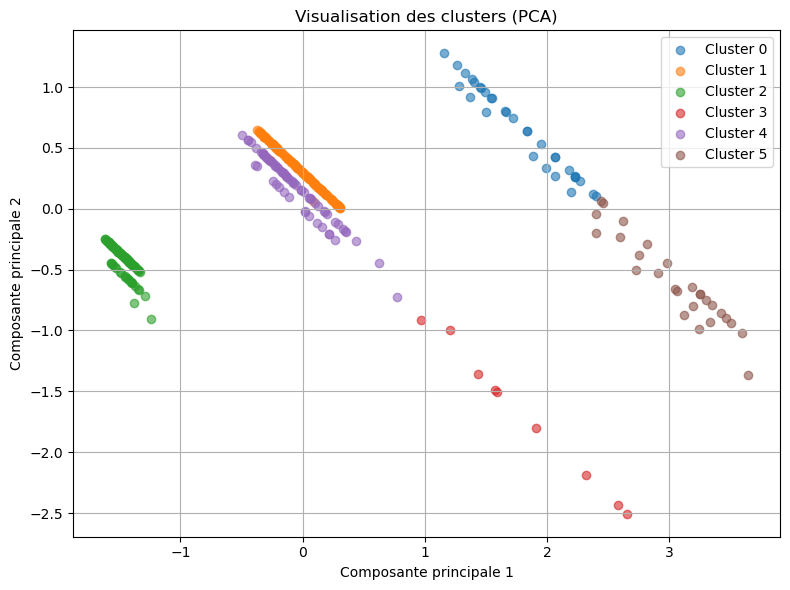

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# X_prepared est ton jeu de données après prétraitement (déjà standardisé et encodé)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_prepared)

# Visualisation
plt.figure(figsize=(8, 6))
for cluster_id in sorted(df['Cluster'].unique()):
    plt.scatter(X_pca[df['Cluster'] == cluster_id, 0],
                X_pca[df['Cluster'] == cluster_id, 1],
                label=f'Cluster {cluster_id}', alpha=0.6)

plt.title("Visualisation des clusters (PCA)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Si tu n’as pas encore :
y_pred = kmeans_final.predict(X_prepared)

silhouette = silhouette_score(X_prepared, df['Cluster'])
davies = davies_bouldin_score(X_prepared, df['Cluster'])
calinski = calinski_harabasz_score(X_prepared, df['Cluster'])

print(f"Silhouette Score : {silhouette:.3f} ")
print(f"Davies-Bouldin Index : {davies:.3f} ")
print(f"Calinski-Harabasz Score : {calinski:.3f} ")


Silhouette Score : 0.605 
Davies-Bouldin Index : 0.757 
Calinski-Harabasz Score : 537.201 


In [15]:
df.groupby(['Cluster'])['Type'].value_counts()

Cluster  Type    
0        resort       31
         business      1
1        resort      119
         business      2
2        resort       96
         business      3
3        business      8
         resort        1
4        resort       53
         business     16
5        resort       22
         business      5
Name: count, dtype: int64

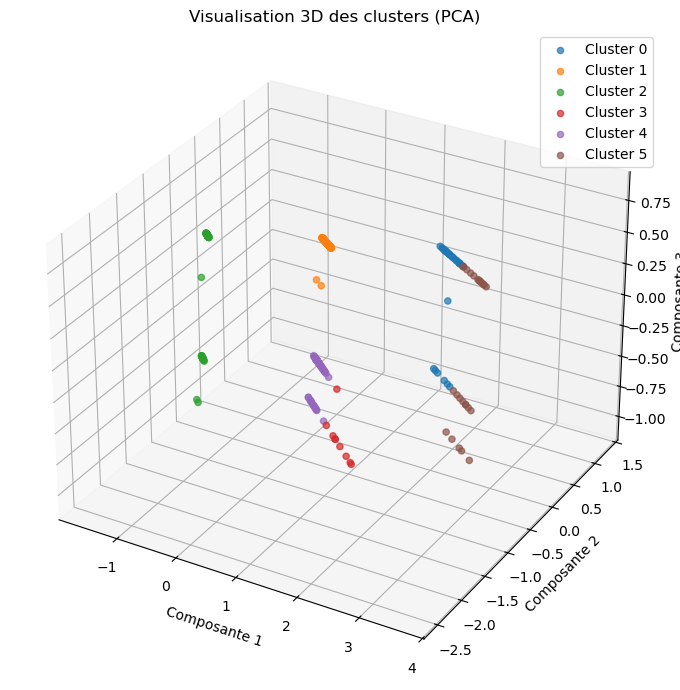

In [16]:
from mpl_toolkits.mplot3d import Axes3D  # activation 3D

# 1. Appliquer PCA sur 3 dimensions
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_prepared)  # X_prepared = données encodées + normalisées

# 2. Créer la figure 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 3. Tracer chaque cluster avec une couleur différente
for cluster_id in sorted(df['Cluster'].unique()):
    mask = df['Cluster'] == cluster_id
    ax.scatter(X_pca_3d[mask, 0], X_pca_3d[mask, 1], X_pca_3d[mask, 2],
               label=f"Cluster {cluster_id}", alpha=0.7)

# 4. Personnalisation
ax.set_title("Visualisation 3D des clusters (PCA)")
ax.set_xlabel("Composante 1")
ax.set_ylabel("Composante 2")
ax.set_zlabel("Composante 3")
ax.legend()
plt.tight_layout()
plt.show()